### Class 2

1. ecdfs
2. Parametric ("analytic") versus nonparametric ("hacker statistics")
    * Confidence Intervals
    * Testing
2. Resampling
    * Permutations
    * Bootstrap
    

In [1]:
%run ./sampleBabies.py

gender
female    3389.80425
male      3495.30875
Name: dbirwt, dtype: float64
gender
female    91.499786
male      85.984627
Name: dbirwt, dtype: float64


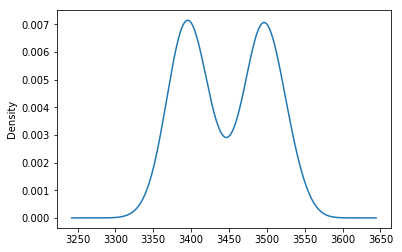

In [5]:
#experiment a bit
SM640.dbirwt.plot.density()


The density -like a histogram- has a few complications that include the arbitrary choice of bin width (kernel width for density) and the loss of information. Welcome to the *empirical cumulative distribution function* **ecdf**

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


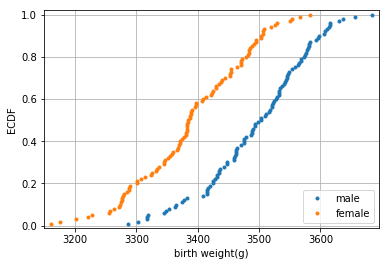

In [8]:
male40 = SM40[SM40.gender == "male"].dbirwt
female40 = SM40[SM40.gender == "female"].dbirwt
# Compute ECDF for sample size 40: m_40, f_40
mx_40, my_40 = ecdf(male40)
fx_40, fy_40 = ecdf(female40)

# Plot all ECDFs on the same plot
_ = plt.plot(mx_40, my_40, marker = '.', linestyle = 'none')
_ = plt.plot(fx_40, fy_40, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('male', 'female'), loc='lower right')
_ = plt.xlabel('birth weight(g)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.grid()
plt.show()

- What is the relationship to quantiles/percentiles ?
- Find the IQR !
- Sketch the densities just from the ecdf.

### Checking Normality of sample mean distribution

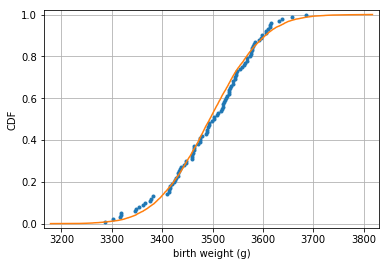

In [9]:
# Compute mean and standard deviation: mu, sigma
xBar = np.mean(male40)
sigmaHat = np.std(male40)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(xBar, sigmaHat, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(mx_40, my_40, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
plt.margins(0.02)
_ = plt.xlabel('birth weight (g)')
_ = plt.ylabel('CDF')

plt.grid()
plt.show()


### Tasks
1. Find the "5% tails" which are just the (0.05, 0.95) quantiles 
2. Read up on theoretical quantiles: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
3. stone age: get the "5% tails" from a normal table.
4. How many stdevs do you need to cover the 90% sample interval ?
5. Can you replace the "empirical theoretical cdf" from above with the exact line without sampling 10000 random numbers from a normal distribution ?


In [10]:
from scipy.stats import norm 
norm.ppf(0.05,loc=xBar,scale=sigmaHat)

z=norm.ppf(0.05)

print(xBar + z*sigmaHat)
print(z)


3354.5855618640885
-1.6448536269514729


--------------------------------------------------------------
Let us recap what we observed when sampling from a "population": The *sample mean distribution* gets narrower with increasing sample size n, SEM =$\sigma_{\bar{x}} = \sigma/\sqrt{n}$.
How is this useful ? And how is it relevant because in reality we would only have **one sample**, not hundreds !

#### Small Tasks

1. Choose one random sample of size n=40 from the male babies and compute $\bar{x}$, $\hat{\sigma}$. Assume all that is known to you, are these two *summary statistics*. In particular, we do **not know** the true mean $\mu$!
2. Argue intuitively with the ecdf plot about plausible values of $\mu$.
3. More precisely: what interval around $\bar{x}$ would contain $\mu$ with 90% probability ?









In [11]:
random.seed(123)
#df[range(10)]

filtered = df[df.dbirwt >= 500][df[df.dbirwt >= 500]  <= 8000]


male_df = filtered.loc[filtered['gender'] == 'male']
x=male_df['dbirwt'].sample(40)
xBar = np.mean(x)
sHat = np.std(x)
#options(digits=4)

print(xBar, sHat)    

3446.4 614.9616573413338


In [12]:
#CI 95%
xBar + np.array([-1,1])*2*sHat/np.sqrt(40)
#xBar + 2*sHat/np.sqrt(40)

norm.interval(alpha=0.05,loc=xBar, scale=sHat)

(3407.837735909506, 3484.962264090494)

### Hacker Statistic

The ability to draw new samples from a population with a known mean is a luxury that we usually do not have. Is there any way to "fake" new samples using just the one "lousy" sample we have at hand ? 
This might sound like an impossible feat analogously to "pulling yourself up by your own **bootstraps**"!
But that is exactly what we will try now:


Tasks
0. Look up the help for *np.random.choice()* https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html
1. Draw repeated samples of size n=40 from the sample above.
2. Compute the mean of each sample and store it an array.
3. Plot the histogram
4. Compute the stdev of this distribution and compare to the SEM.
5. Write a function that computes *bootstrap replicates* of the mean from a sample.
6. Generalize this function to accept any summary statistic, not just the mean.

In [13]:
random.seed(123) 
rsx = []    
for i in range(1000):
    rsx.append(np.mean(x.sample(40, replace=True)))    

array([3252.321875, 3634.4175  ])

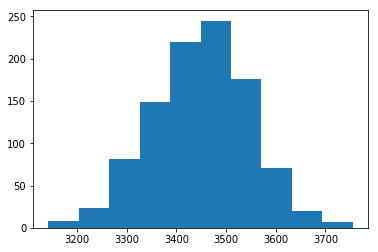

In [14]:
plt.hist(rsx)
np.std(rsx)
np.percentile(rsx, [2.5, 97.5])


#### Bootstrap replicates of other statistics

The mean is just one of many sample summaries that we might be interested in. 
Recall the Auto data, in particular the boxplot of mpg ~ cylinders. The graph suggested that not only does the mean mpg seems too decrease with number of cylinders but also the variance.
Let us get **confidence intervals** of the stdev for cyl = 4 and compare to cyl=6. 

**Tasks**
- Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
- Argue intuitively whether the stdevs are clearly different.

#### Upcoming Topics

- Linear Regression and bootstrap
    * intercept and slope
    * software reports
- Permutation tests
    * one-sample vs. 2-samples
    * compare with parametric t-test
- Binomial Processes
    * Brownian Motion
    * Variance/Mean
    * Risk as a function of size
